In [43]:
#Dependencies
import pandas as pd
import tweepy
from datetime import datetime as dt
from datetime import date
from datetime import timedelta
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from time import strftime
import math


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from apikeys import consumer_key, consumer_secret, access_token, access_token_secret




import requests
import json
from apikeys import av_key
import pandas as pd
import os
import csv
import sys

from functools import reduce
from scipy import stats
from textwrap import wrap

In [44]:
# Read Main_Data CSV file

merge_table1=pd.read_csv('Resource_CSVs/Main_data_Likes.csv')

# Calculating Correlation - Method 1
# https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.corr.html
merge_table1.corr(method='pearson', min_periods=1)

,index,Likes,Retweets,Compound,Negative,Neutral,Positive,S&P500 Open,S&P500 Close,DJ Open,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
index,1.000000,0.100787,0.113536,-0.075646,0.108314,-0.048417,-0.039359,0.890605,0.885417,0.862625,...,-0.064752,-0.021075,-0.015201,0.132494,-0.004775,0.001800,-0.060527,0.038386,0.037536,-0.024656
Likes,0.100787,1.000000,0.924388,-0.077381,0.061398,0.036106,-0.095660,0.108883,0.136512,0.116378,...,0.056551,-0.060479,0.041438,0.016369,0.129205,-0.024185,0.118160,-0.007484,-0.013005,0.017606
Retweets,0.113536,0.924388,1.000000,-0.093420,0.046562,0.063688,-0.114423,0.104753,0.124194,0.115088,...,0.043275,-0.024933,0.007943,0.041767,0.110668,0.000471,0.082464,0.034101,-0.026542,-0.023918
Compound,-0.075646,-0.077381,-0.093420,1.000000,-0.718836,-0.119957,0.770148,-0.017174,-0.013270,-0.030563,...,0.028337,-0.055996,-0.127130,-0.065764,-0.081934,-0.102476,-0.057010,-0.039741,0.137561,-0.003605
Negative,0.108314,0.061398,0.046562,-0.718836,1.000000,-0.543187,-0.253277,0.042355,0.036407,0.059152,...,-0.029761,-0.043929,0.120776,-0.027262,0.056509,0.138023,0.033649,0.078833,-0.064897,-0.047231
Neutral,-0.048417,0.036106,0.063688,-0.119957,-0.543187,1.000000,-0.674657,-0.013050,-0.008355,-0.003488,...,0.011240,0.103807,-0.056920,0.081827,0.014099,-0.044669,0.014694,-0.083226,-0.059980,0.096454
Positive,-0.039359,-0.095660,-0.114423,0.770148,-0.253277,-0.674657,1.000000,-0.022009,-0.022169,-0.047767,...,0.013289,-0.080797,-0.040702,-0.070257,-0.065852,-0.069744,-0.046445,0.026625,0.126014,-0.069665
S&P500 Open,0.890605,0.108883,0.104753,-0.017174,0.042355,-0.013050,-0.022009,1.000000,0.985725,0.983740,...,-0.126274,-0.042387,-0.047694,0.081813,-0.067452,0.019219,-0.115138,0.024277,-0.015831,-0.098095
S&P500 Close,0.885417,0.136512,0.124194,-0.013270,0.036407,-0.008355,-0.022169,0.985725,1.000000,0.969958,...,-0.003807,-0.046187,0.029654,0.093633,0.058308,-0.011080,0.029880,0.007992,0.026936,-0.094951
DJ Open,0.862625,0.116378,0.115088,-0.030563,0.059152,-0.003488,-0.047767,0.983740,0.969958,1.000000,...,-0.127157,-0.043133,-0.033590,0.094685,-0.044638,0.034489,-0.101281,0.035237,-0.043397,-0.123685


In [45]:
# Calculating Correlation - Method 2
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

listn =[]
correlation =[]
pvalue =[]

a = "Likes"
b = "S&P500 Same-Day Change"
c = stats.pearsonr(merge_table1[a], merge_table1[b])

print (f"Correlation = {c[0]}")
print (f"P-value = {c[1]}")

Correlation = 0.15342860482453544
P-value = 0.04031460601396737


In [46]:
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/named_column_selection_loc/
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.r_.html

stats_df = merge_table1.iloc[:, np.r_[1,2, 34:len(merge_table1.columns)]]
print (stats_df.head(2))


         Date   Likes  S&P500 Same-Day Change  S&P500 1-Day Change  \
0  2017-06-05  215938                   -0.07                -0.28   
1  2017-06-06  183931                   -0.11                 0.16   

   S&P500 2-Day Change  DJ Same-Day Change  DJ 1-Day Change  DJ 2-Day Change  \
0                -0.12               -0.05            -0.23            -0.05   
1                 0.18               -0.04             0.18             0.22   

   NAS Same-Day Change  NAS 1-Day Change          ...           \
0                -0.16             -0.33          ...            
1                -0.11              0.36          ...            

   Insurance Same-Day Change  Insurance 1-Day Change  Oil Same-Day Change  \
0                      -0.72                   -1.23                 1.11   
1                      -0.89                   -0.12                 1.37   

   Oil 1-Day Change  Semiconductor Same-Day Change  \
0              0.85                           0.34   
1        

In [47]:
stats_df.describe()

,Likes,S&P500 Same-Day Change,S&P500 1-Day Change,S&P500 2-Day Change,DJ Same-Day Change,DJ 1-Day Change,DJ 2-Day Change,NAS Same-Day Change,NAS 1-Day Change,NAS 2-Day Change,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,174063.983240,-0.056201,0.049274,0.130782,-0.057486,0.073184,0.185363,-0.065084,0.076648,0.187207,...,-0.033296,-0.025810,0.000670,0.018436,-0.114190,0.101006,-0.042402,0.053911,-0.015475,-0.020838
std,109015.514228,0.726447,0.803250,0.868805,0.780823,0.860609,0.941495,0.884494,0.957683,1.097515,...,0.815994,0.910758,1.501948,1.755044,1.348575,1.518812,0.883456,1.089673,0.742486,0.733067
min,38888.000000,-3.870000,-4.100000,-2.430000,-4.180000,-4.600000,-3.150000,-4.110000,-3.900000,-3.760000,...,-3.500000,-3.570000,-4.340000,-4.520000,-4.810000,-4.720000,-3.950000,-4.500000,-2.020000,-2.040000
25%,93929.000000,-0.180000,-0.205000,-0.305000,-0.235000,-0.235000,-0.290000,-0.380000,-0.280000,-0.380000,...,-0.505000,-0.460000,-0.840000,-1.080000,-0.650000,-0.595000,-0.415000,-0.375000,-0.535000,-0.505000
50%,148999.000000,0.020000,0.090000,0.160000,0.050000,0.110000,0.210000,0.030000,0.090000,0.170000,...,0.000000,-0.010000,-0.070000,0.040000,-0.040000,0.250000,0.030000,0.100000,-0.020000,-0.010000
75%,217987.000000,0.230000,0.360000,0.575000,0.285000,0.405000,0.720000,0.365000,0.555000,0.790000,...,0.450000,0.480000,1.055000,0.940000,0.735000,0.875000,0.540000,0.580000,0.445000,0.410000
max,567733.000000,2.350000,2.720000,2.910000,2.580000,2.840000,3.100000,3.380000,3.260000,3.020000,...,3.070000,2.730000,4.110000,5.410000,4.180000,4.240000,2.240000,3.770000,2.550000,2.120000


In [48]:
a = stats_df.columns[2:5]
print(a) 
type(a)

Index(['S&P500 Same-Day Change', 'S&P500 1-Day Change', 'S&P500 2-Day Change'], dtype='object')


pandas.core.indexes.base.Index

In [49]:
a = stats_df["S&P500 Same-Day Change"].mean()

In [50]:
# Computing Correlation for the Stock Indices
list_index =[]
correlation_index =[]
pvalue_index =[]
average_change = []

list_selected = stats_df.columns[2:11]

for cols in list_selected:
    list_index.append(cols)
    cor = stats.pearsonr(stats_df["Likes"], stats_df[cols])
    correlation_index.append(cor[0])
    pvalue_index.append(cor[1])
    mean = stats_df[cols].mean()
    average_change.append(mean)
    
correlation_index_df = pd.DataFrame({
    'Indices': list_index,
    'Correlation_Likes': correlation_index,
    'Average Change': average_change
})

# correlation_index_df = correlation_index_df.sort_values('Correlation_Compound Score', ascending=True)
correlation_index_df

,Indices,Correlation_Likes,Average Change
0,S&P500 Same-Day Change,0.153429,-0.056201
1,S&P500 1-Day Change,0.003422,0.049274
2,S&P500 2-Day Change,0.016402,0.130782
3,DJ Same-Day Change,0.135920,-0.057486
4,DJ 1-Day Change,-0.006479,0.073184
5,DJ 2-Day Change,-0.002173,0.185363
6,NAS Same-Day Change,0.146080,-0.065084
7,NAS 1-Day Change,0.015368,0.076648
8,NAS 2-Day Change,0.031457,0.187207


In [51]:
correlation_index_df["Correlation_Likes"][0]

0.15342860482453544

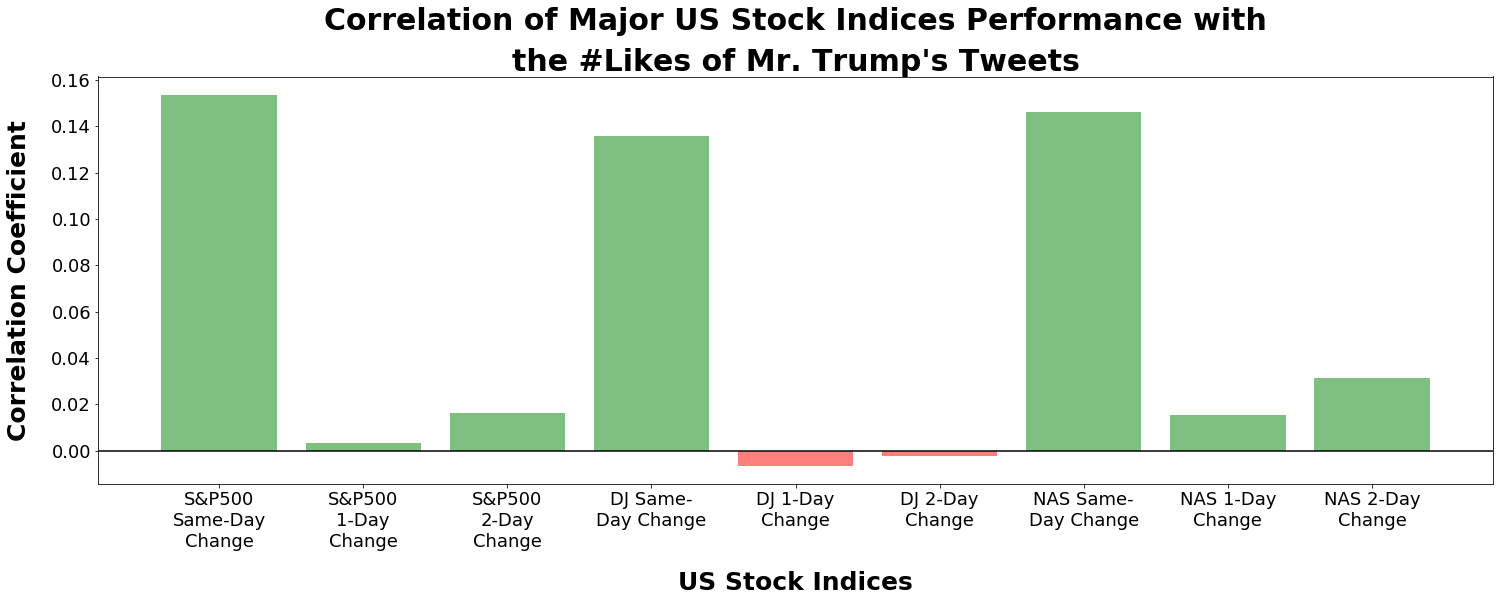

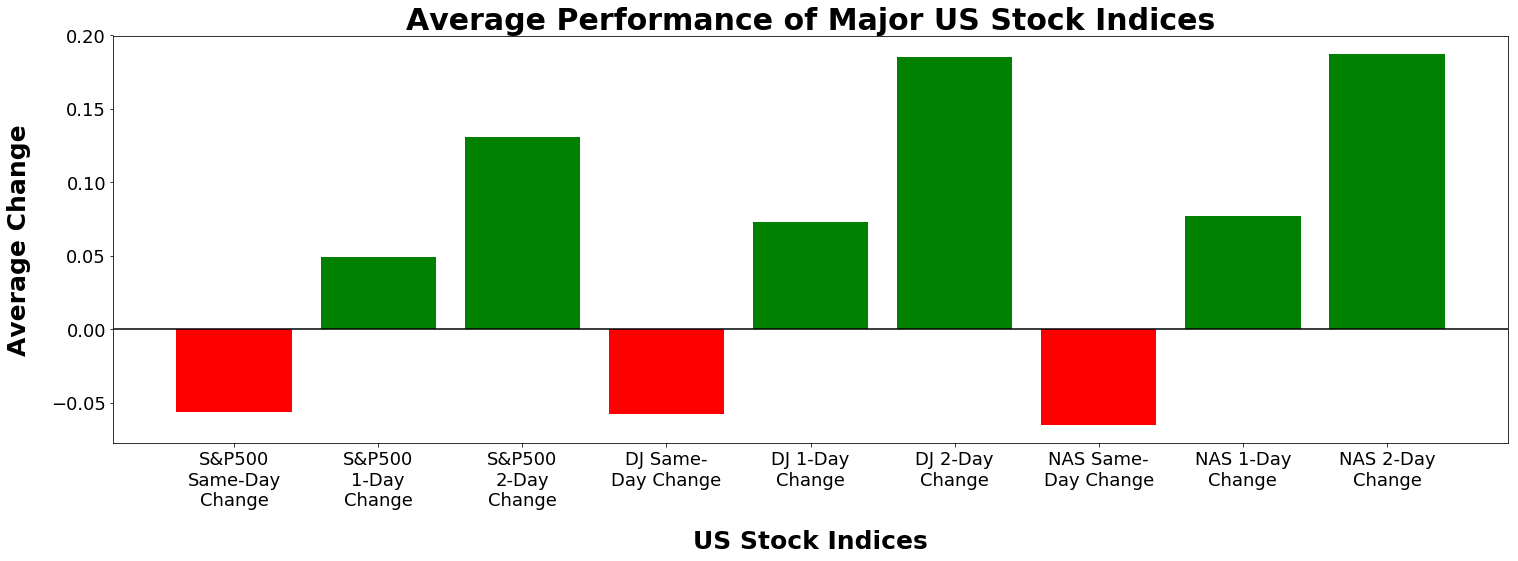

<Figure size 432x288 with 0 Axes>

In [52]:
#  Plotting the stock correlation bar chart
x = len (correlation_index_df)

x_axis = np.arange(len(correlation_index_df))
y_axis = correlation_index_df["Correlation_Likes"]
labels = correlation_index_df["Indices"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, alpha=0.5, tick_label=labels,
        color = ['red' if correlation_index_df["Correlation_Likes"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Correlation of Major US Stock Indices Performance with the #Likes of Mr. Trump's Tweets")
title_text = '\n'.join(wrap(title_text,55))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Correlation Coefficient', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Stock Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero


#  Plotting the Average Performance bar chart
x = len (correlation_index_df)

x_axis = np.arange(len(correlation_index_df))
y_axis = correlation_index_df["Average Change"]
labels = correlation_index_df["Indices"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, tick_label=labels,
        color = ['red' if correlation_index_df["Average Change"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Average Performance of Major US Stock Indices")
title_text = '\n'.join(wrap(title_text,55))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Average Change', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Stock Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero


plt.savefig("Images/Correlation_Likes_Index.png")
plt.show()
plt.tight_layout()


In [53]:
sector_list = stats_df.columns[12:len(stats_df)]
print (sector_list)

Index(['Banking 1-Day Change', 'Biotech Same-Day Change',
       'Biotech 1-Day Change', 'Healthcare Same-Day Change',
       'Healthcare 1-Day Change', 'Housing Same-Day Change',
       'Housing 1-Day Change', 'Industrial Same-Day Change',
       'Industrial 1-Day Change', 'Insurance Same-Day Change',
       'Insurance 1-Day Change', 'Oil Same-Day Change', 'Oil 1-Day Change',
       'Semiconductor Same-Day Change', 'Semiconductor 1-Day Change',
       'Telecom Same-Day Change', 'Telecom 1-Day Change',
       'Utility Same-Day Change', 'Utility 1-Day Change'],
      dtype='object')


In [54]:
# Computing Correlation for the Sector Indices - Same Day Performance
list_sectors1 =[]
correlation_sector1 =[]
pvalue_sector1 =[]
average_change = []

sector_list1 = stats_df.columns[[11,13,15,17,19,21,23,25,27,29]]


for cols in sector_list1:
    list_sectors1.append(cols)
    cor = stats.pearsonr(stats_df["Likes"], stats_df[cols])
    correlation_sector1.append(cor[0])
    pvalue_sector1.append(cor[1])
    mean = stats_df[cols].mean()
    average_change.append(mean)
    
correlation_sector_df1 = pd.DataFrame({
    'Sectors': list_sectors1,
    'Correlation_Likes': correlation_sector1,
    'Average Change' : average_change
})

correlation_sector_df1

,Sectors,Correlation_Likes,Average Change
0,Banking Same-Day Change,0.057192,-0.072793
1,Biotech Same-Day Change,0.103443,-0.114525
2,Healthcare Same-Day Change,0.129360,-0.065363
3,Housing Same-Day Change,0.085029,0.001955
4,Industrial Same-Day Change,0.159179,-0.061620
5,Insurance Same-Day Change,0.056551,-0.033296
6,Oil Same-Day Change,0.041438,0.000670
7,Semiconductor Same-Day Change,0.129205,-0.114190
8,Telecom Same-Day Change,0.118160,-0.042402
9,Utility Same-Day Change,-0.013005,-0.015475


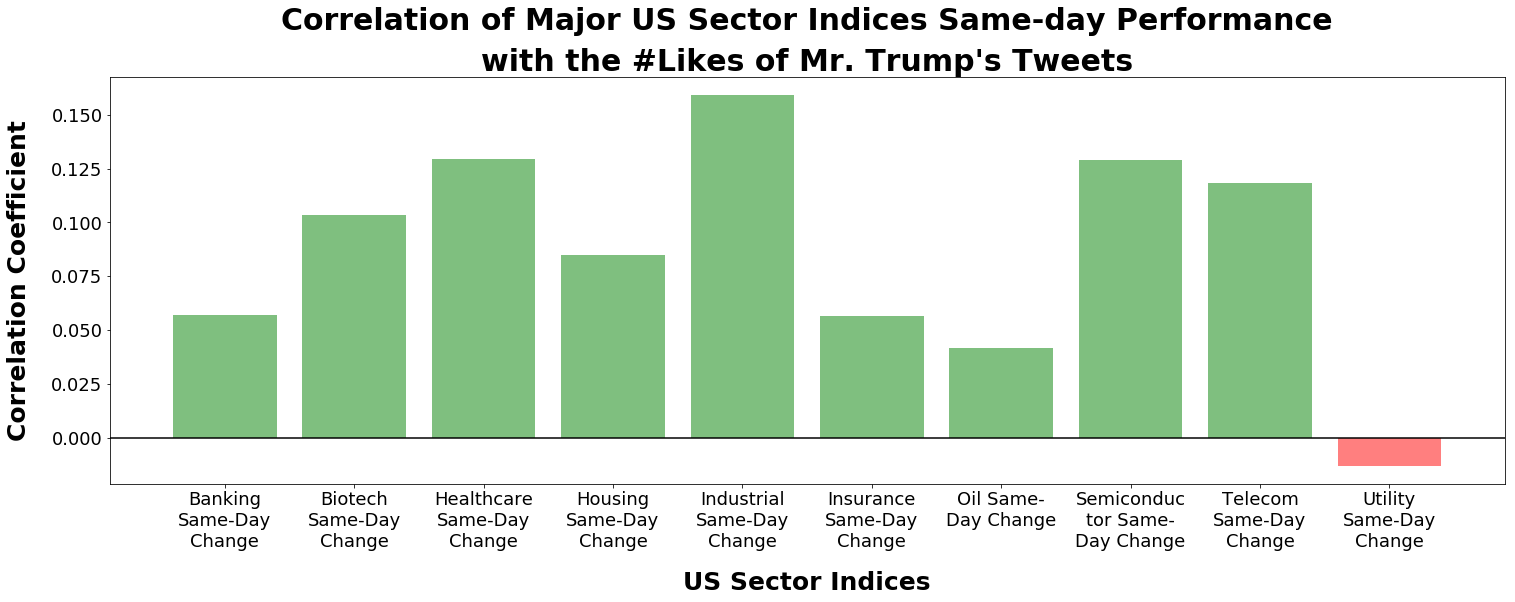

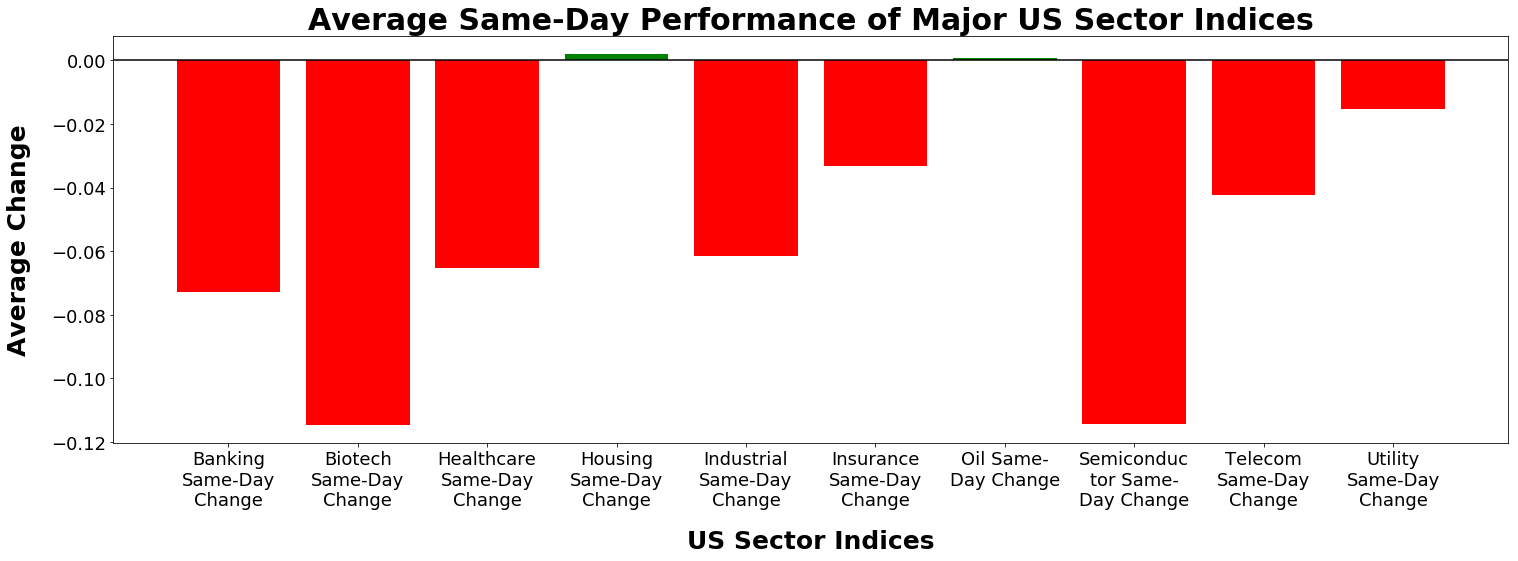

<Figure size 432x288 with 0 Axes>

In [55]:
#  Plotting the sector correlation bar chart
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Correlation_Likes"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, alpha=0.5, tick_label=labels,
        color = ['red' if correlation_sector_df1["Correlation_Likes"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Correlation of Major US Sector Indices Same-day Performance with the #Likes of Mr. Trump's Tweets")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Correlation Coefficient', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero



#  Plotting the Average Performance bar chart
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Average Change"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, tick_label=labels,
        color = ['red' if correlation_sector_df1["Average Change"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Average Same-Day Performance of Major US Sector Indices")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Average Change', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero



plt.savefig("Images/Correlation_Likes_Sector_1.png")
plt.show()
plt.tight_layout()

In [56]:
# Computing Correlation for the Sector Indices - Next Days Performance
list_sectors1 =[]
correlation_sector1 =[]
pvalue_sector1 =[]
average_change = []

sector_list1 = stats_df.columns[[12,14,16,18,20,22,24,26,28,30]]


for cols in sector_list1:
    list_sectors1.append(cols)
    cor = stats.pearsonr(stats_df["Likes"], stats_df[cols])
    correlation_sector1.append(cor[0])
    pvalue_sector1.append(cor[1])
    mean = stats_df[cols].mean()
    average_change.append(mean)
    
correlation_sector_df1 = pd.DataFrame({
    'Sectors': list_sectors1,
    'Correlation_Likes': correlation_sector1,
    'Average Change' : average_change
})

correlation_sector_df1

,Sectors,Correlation_Likes,Average Change
0,Banking 1-Day Change,-0.102376,0.006089
1,Biotech 1-Day Change,0.045389,0.019050
2,Healthcare 1-Day Change,0.036094,0.046369
3,Housing 1-Day Change,-0.006714,0.050391
4,Industrial 1-Day Change,0.052559,0.049162
5,Insurance 1-Day Change,-0.060479,-0.025810
6,Oil 1-Day Change,0.016369,0.018436
7,Semiconductor 1-Day Change,-0.024185,0.101006
8,Telecom 1-Day Change,-0.007484,0.053911
9,Utility 1-Day Change,0.017606,-0.020838


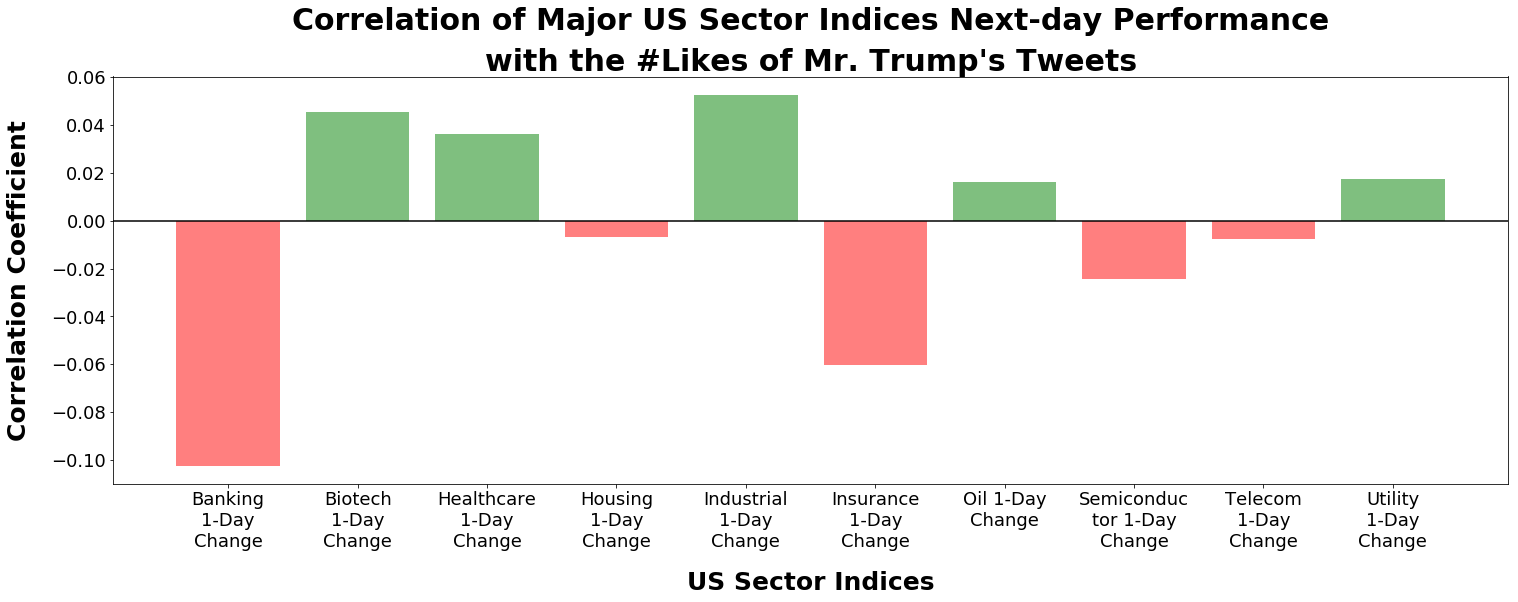

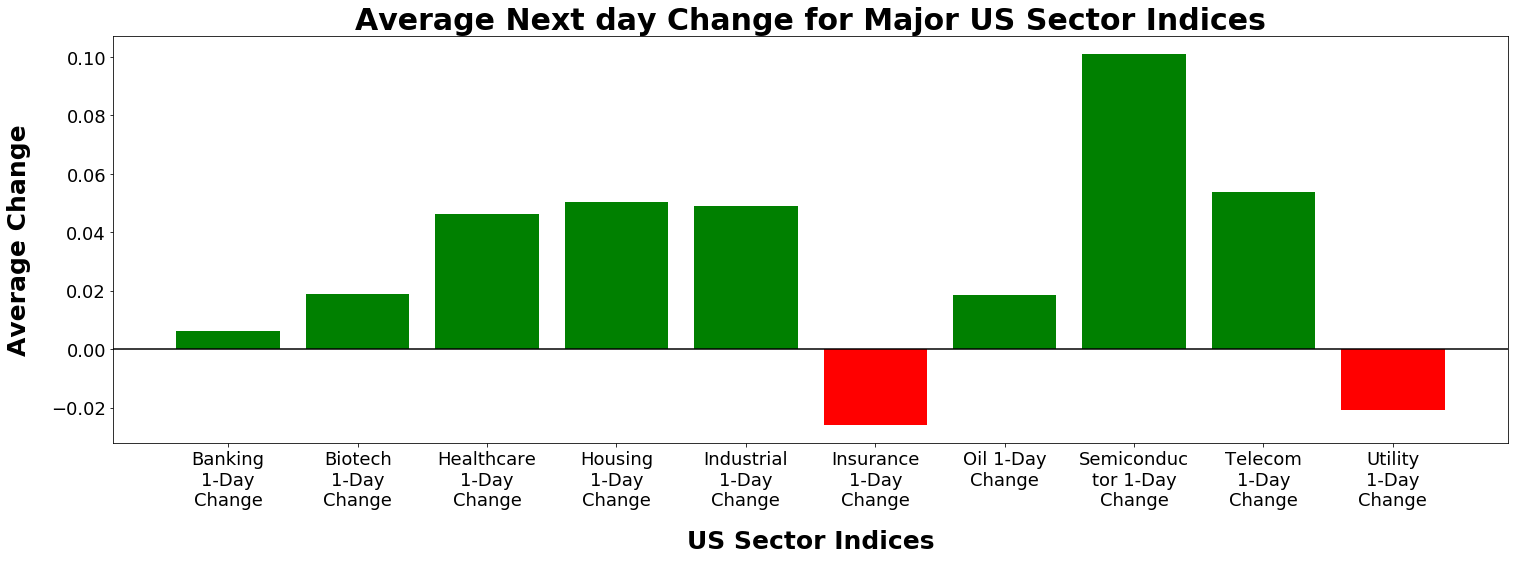

<Figure size 432x288 with 0 Axes>

In [57]:
#  Plotting the sector correlation bar chart -2 - Next day's Performance
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Correlation_Likes"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, alpha=0.5, tick_label=labels,
        color = ['red' if correlation_sector_df1["Correlation_Likes"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Correlation of Major US Sector Indices Next-day Performance with the #Likes of Mr. Trump's Tweets")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Correlation Coefficient', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero


#  Plotting the Average Performance bar chart
x = len (correlation_sector_df1)

x_axis = np.arange(len(correlation_sector_df1))
y_axis = correlation_sector_df1["Average Change"]
labels = correlation_sector_df1["Sectors"]
# wrap axis lables
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]


plt.figure(figsize = (25,7.5))
plt.tick_params(axis="both", labelsize =18)
plt.bar(x_axis, y_axis, tick_label=labels,
        color = ['red' if correlation_sector_df1["Average Change"][y] < 0 
                 else 'green' for y in range (0,x)])


title_text = (f"Average Next day Change for Major US Sector Indices")
title_text = '\n'.join(wrap(title_text,60))

plt.title(title_text, fontdict = {'fontsize': 30, 'fontweight': 'bold'}, linespacing=1.5)
plt.ylabel('Average Change', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.xlabel('US Sector Indices', fontdict = {'fontsize': 25, 'fontweight': 'bold'}, labelpad = 20)
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero

plt.savefig("Images/Correlation_Likes_Sector_2.png")
plt.show()
plt.tight_layout()